<a href="https://colab.research.google.com/github/MekhzZ/opencv_bootcamp_exercise/blob/main/03_Annotating_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Setting the Default Figure Size in Matplotlib

matplotlib.rcParams['figure.figsize'] = (9.0, 9.0)

In [ ]:
# func to download ans extract the data

def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

In [ ]:
# downloading required data from url

URL = r"https://www.dropbox.com/s/48hboi1m4crv1tl/opencv_bootcamp_assets_NB3.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), "opencv_bootcamp_assets_NB3.zip")

# Download if assest ZIP does not exists.
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)

In [ ]:
# reading image by default bgr format

image = cv2.imread('/content/Apollo_11_Launch.jpg')

In [ ]:
image.shape

(720, 1280, 3)

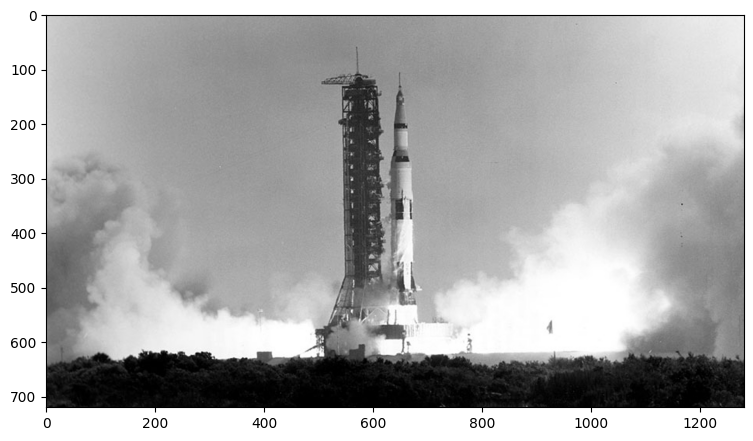

In [ ]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))


**`line`**: <a href="https://docs.opencv.org/4.5.1/d6/d6e/group__imgproc__draw.html#ga7078a9fae8c7e7d13d24dac2520ae4a2" target="_blank">Documentation link</a>

In [ ]:
'''img = cv2.line(img, pt1, pt2, color[, thickness[, lineType[, shift]]])'''

'img = cv2.line(img, pt1, pt2, color[, thickness[, lineType[, shift]]])'

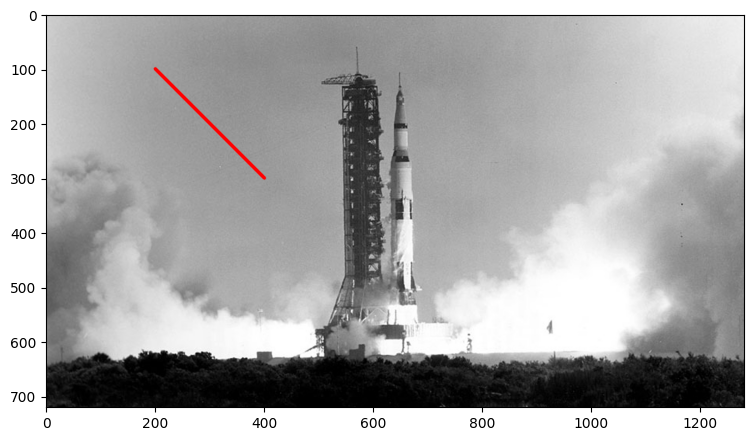

In [ ]:
# drawing line in image

imageLine = image.copy()

cv2.line(imageLine, (200,100), (400,300), (255,0,0), 5)

plt.imshow(imageLine)

In [ ]:
'''img = cv2.circle(img, center, radius, color[, thickness[, lineType[, shift]]])'''

'img = cv2.circle(img, center, radius, color[, thickness[, lineType[, shift]]])'

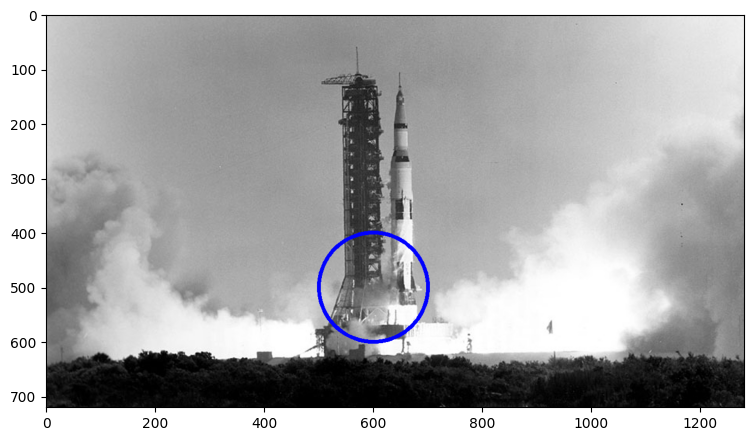

In [ ]:
# Draw a circle

imageCircle = image.copy()

cv2.circle(imageCircle, (600,500), 100, (0,0,255), 5)

plt.imshow(imageCircle)

In [ ]:
'''img = cv2.rectangle(img, pt1, pt2, color[, thickness[, lineType[, shift]]])'''

'img = cv2.rectangle(img, pt1, pt2, color[, thickness[, lineType[, shift]]])'

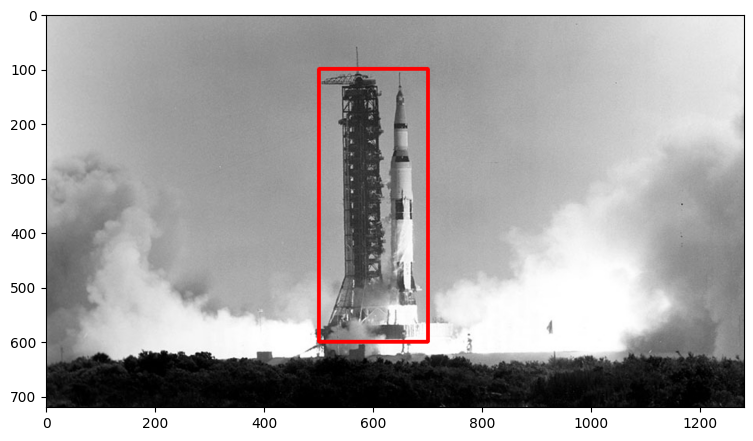

In [ ]:
# drawing rectangle

imageRect = image.copy()

cv2.rectangle(imageRect, (500,100), (700,600), (255,0,0), 5)

plt.imshow(imageRect)

In [ ]:
'''img = cv2.putText(img, text, org, fontFace, fontScale, color[, thickness[, lineType[, bottomLeftOrigin]]])'''

'img = cv2.putText(img, text, org, fontFace, fontScale, color[, thickness[, lineType[, bottomLeftOrigin]]])'

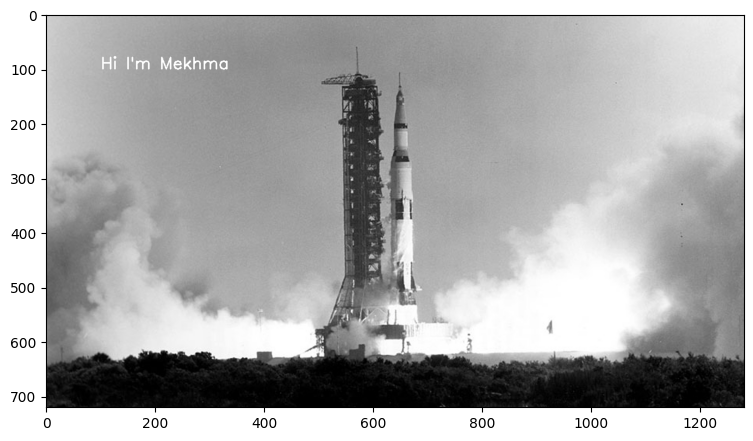

In [ ]:
# writing text in a picture

imageText = image.copy()

cv2.putText(imageText, "Hi I'm Mekhma", (100,100), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)

plt.imshow(imageText)

In [ ]:
# importing required libraries

import os
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import Image

%matplotlib inline
# matplotlib jupyter support

In [ ]:
# it's always good practice to print the library versions for any future use

import sys
print("python", sys.version)
print("cv2 version:", cv2.__version__)
print("numpy version:", np.__version__)
print("matplotlib version:", matplotlib.__version__)
print("os version:", os.name)
print("zipfile version:", ZipFile.__name__)


python 3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]
cv2 version: 4.11.0
numpy version: 2.0.2
matplotlib version: 3.10.0
os version: posix
zipfile version: ZipFile


In [ ]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)